In [135]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm



In [136]:
columns = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','gender','capital_gain','capital_loss','hours_per_week','native_country','income_bracket']
train = pd.read_csv('adult-training.csv', names=columns)
test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## EDA

In [137]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
dtype: object

In [138]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [139]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [140]:
test['income_bracket'] = test['income_bracket'].apply(lambda x: 0 if x==' >50K' else 0)
train['income_bracket'] = train['income_bracket'].apply(lambda x: 1 if x==' >50K' else 0)

numerical_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

categorical_features = ['workclass','education','marital_status','occupation','relationship','race','gender','native_country']
for col in categorical_features:
    print(col)
    print(train[col].unique())
    print(' ')

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 
marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 
gender
[' Male' ' Female']
 
native_country
[' United-States' ' Cuba' ' Ja

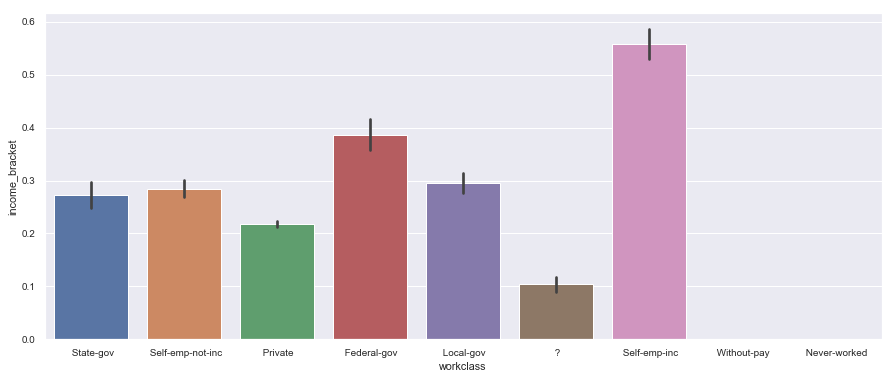

In [141]:
figsize(15, 6)
sns.set(font_scale=0.9)
sns.barplot(x='workclass', y='income_bracket', data=train)

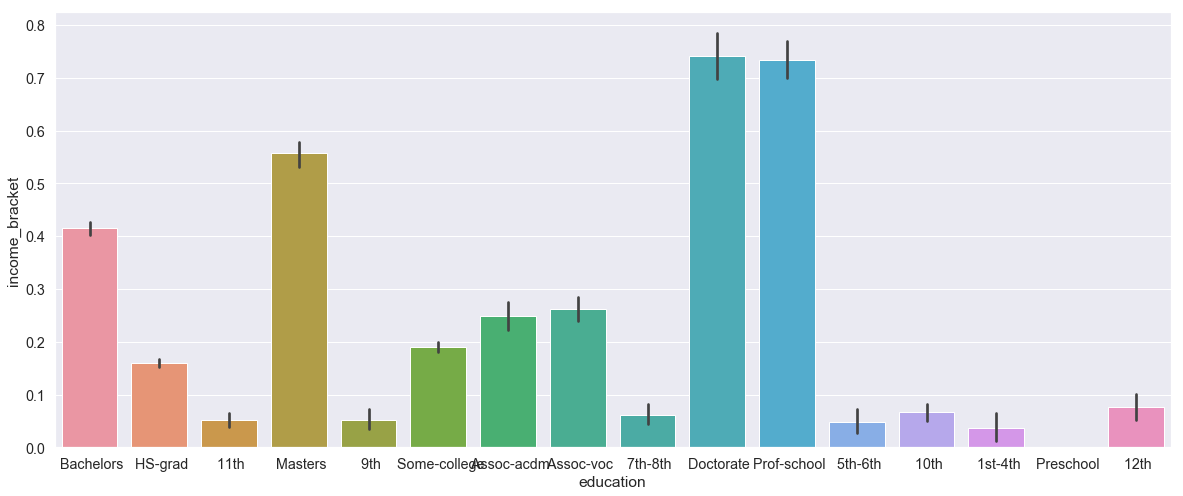

In [142]:
figsize(20, 8)

sns.set(font_scale=1.3)
sns.barplot(x='education', y='income_bracket', data=train)

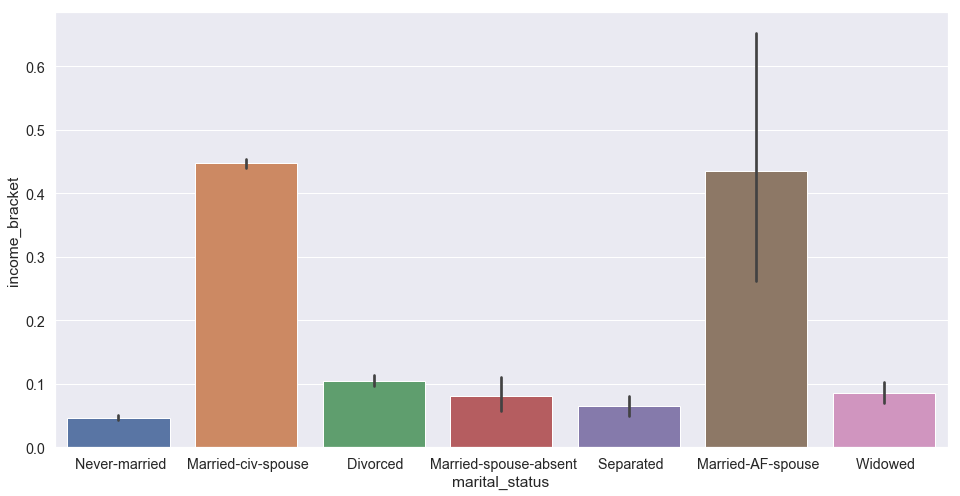

In [143]:
#marital_status
figsize(16, 8)

sns.set(font_scale=1.3)
sns.barplot(x='marital_status', y='income_bracket', data=train)

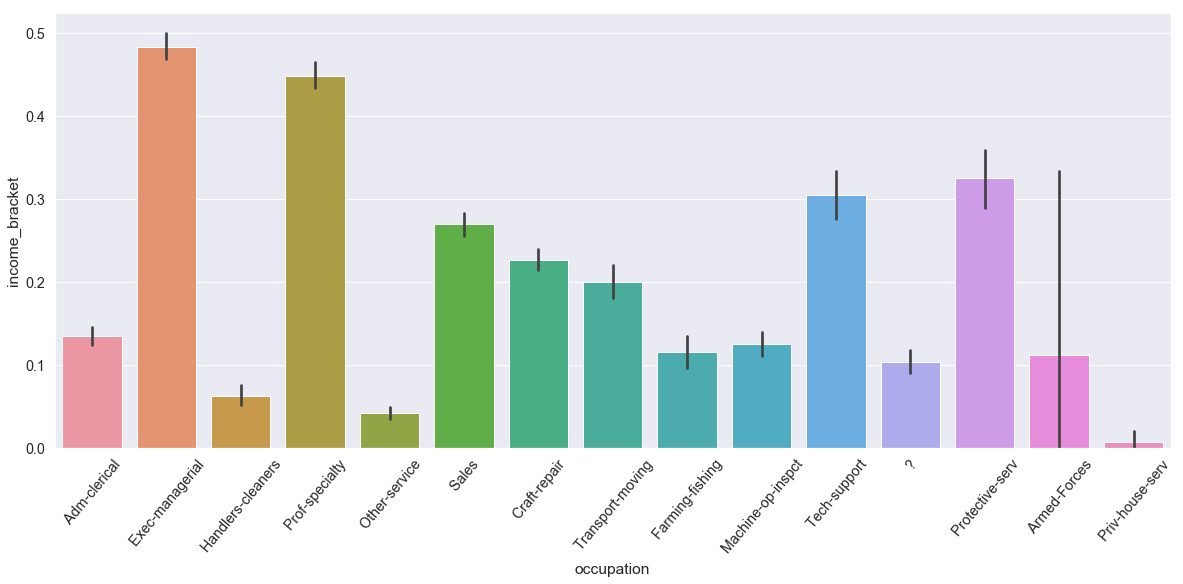

In [144]:
#occupation
figsize(20, 8)
plt.xticks(rotation=50)

sns.set(font_scale=1.3)
sns.barplot(x='occupation', y='income_bracket', data=train)

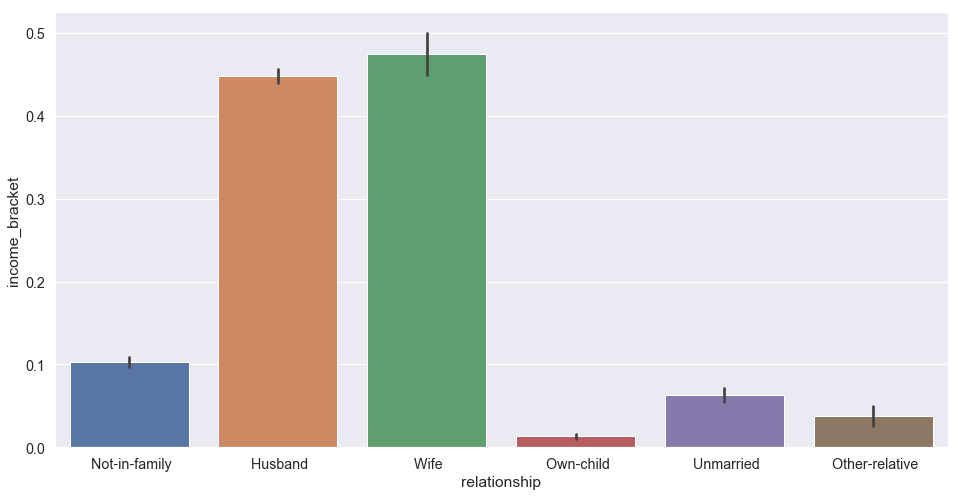

In [145]:
#relationship
figsize(16, 8)

sns.set(font_scale=1.3)
sns.barplot(x='relationship', y='income_bracket', data=train)

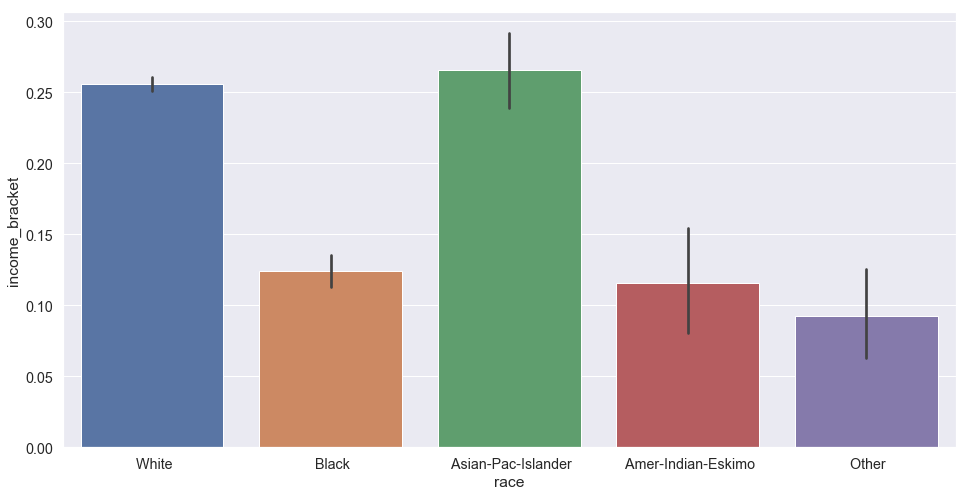

In [146]:
#race
figsize(16, 8)

sns.set(font_scale=1.3)
sns.barplot(x='race', y='income_bracket', data=train)

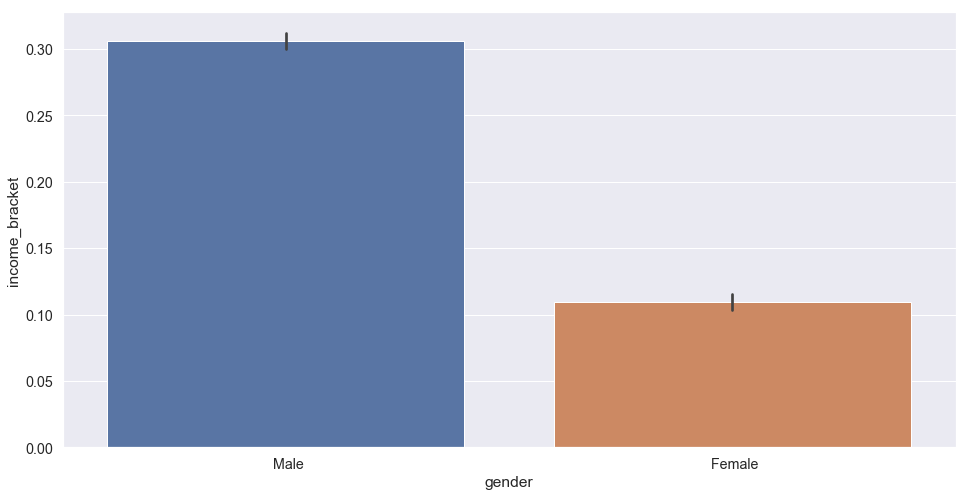

In [147]:
#gender
#sns.set(font_scale=1.3)
sns.barplot(x='gender', y='income_bracket', data=train)

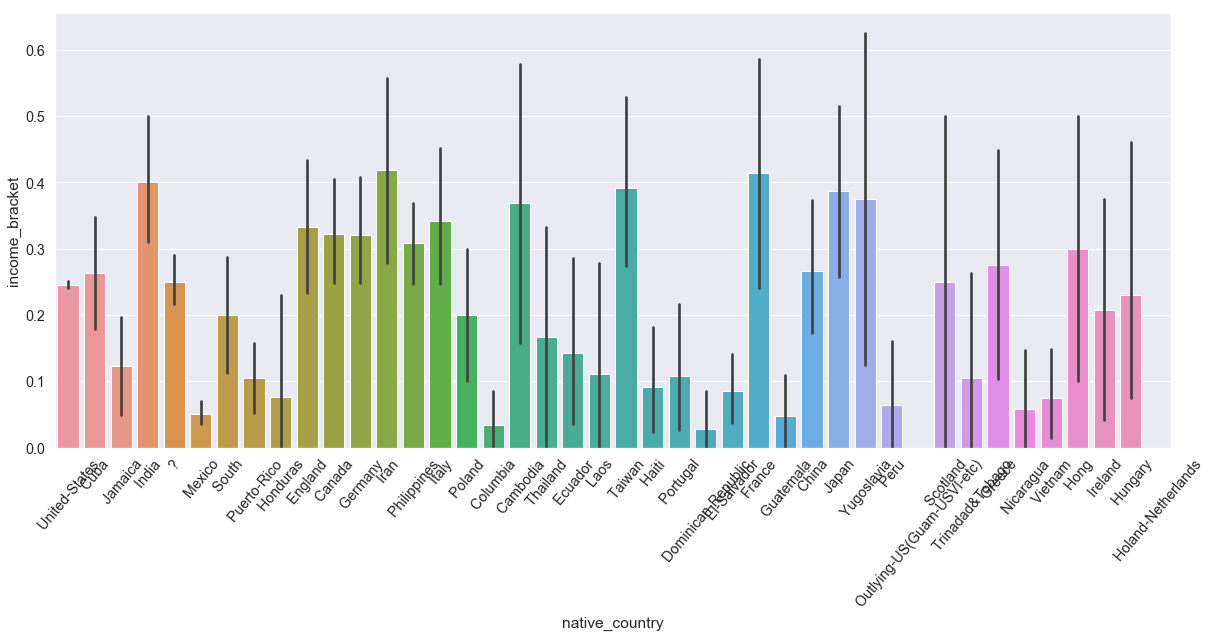

In [148]:
#native_country

figsize(20, 8)
plt.xticks(rotation=50)

sns.set(font_scale=1)
sns.barplot(x='native_country', y='income_bracket', data=train)

In [150]:
numerical_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
for col in numerical_features:
    print(col)
    print('Mean ', train[col].mean())
    print('Median ', train[col].median())
    print('Standard Deviation', train[col].std())
    print("Max ", train[col].max())
    print("Min ", train[col].min())
    print("Skew ", train[col].skew())
    print('  ')

age
Mean  38.58164675532078
Median  37.0
Standard Deviation 13.640432553581146
Max  90
Min  17
Skew  0.5587433694130484
  
fnlwgt
Mean  189778.36651208502
Median  178356.0
Standard Deviation 105549.97769702233
Max  1484705
Min  12285
Skew  1.4469800945789826
  
education_num
Mean  10.0806793403151
Median  10.0
Standard Deviation 2.5727203320673406
Max  16
Min  1
Skew  -0.3116758679102297
  
capital_gain
Mean  1077.6488437087312
Median  0.0
Standard Deviation 7385.292084839299
Max  99999
Min  0
Skew  11.953847687699799
  
capital_loss
Mean  87.303829734959
Median  0.0
Standard Deviation 402.960218649059
Max  4356
Min  0
Skew  4.594629121679692
  
hours_per_week
Mean  40.437455852092995
Median  40.0
Standard Deviation 12.34742868173081
Max  99
Min  1
Skew  0.22764253680450092
  


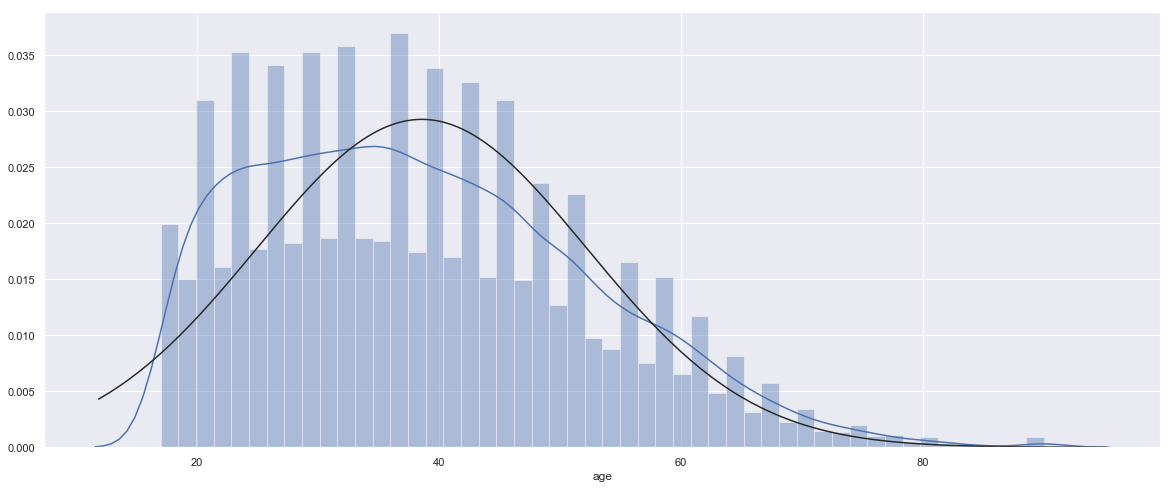

In [151]:
sns.distplot(train['age'], hist=True, fit=norm)

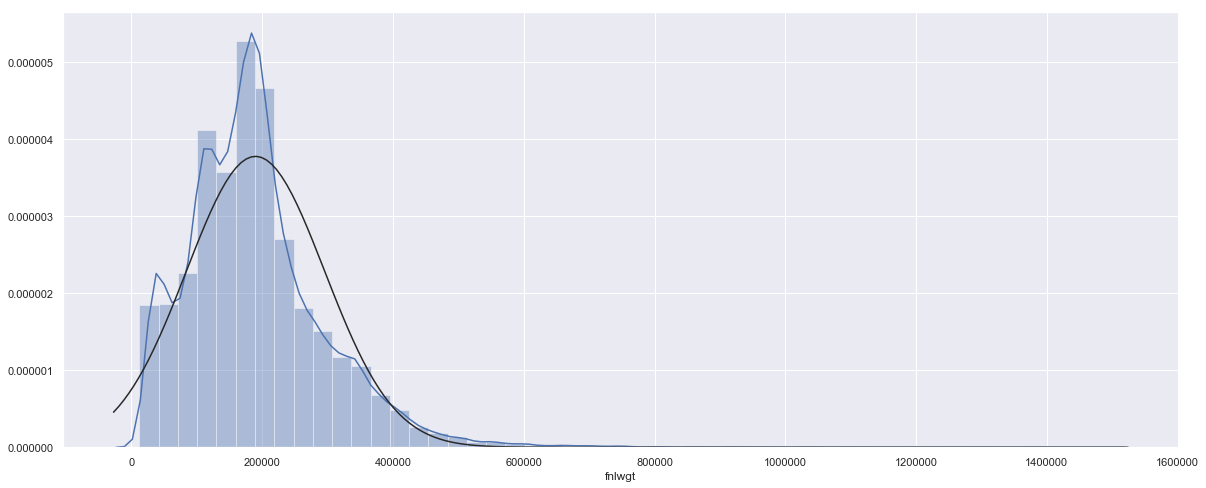

In [152]:
sns.distplot(train['fnlwgt'], hist=True, fit=norm)

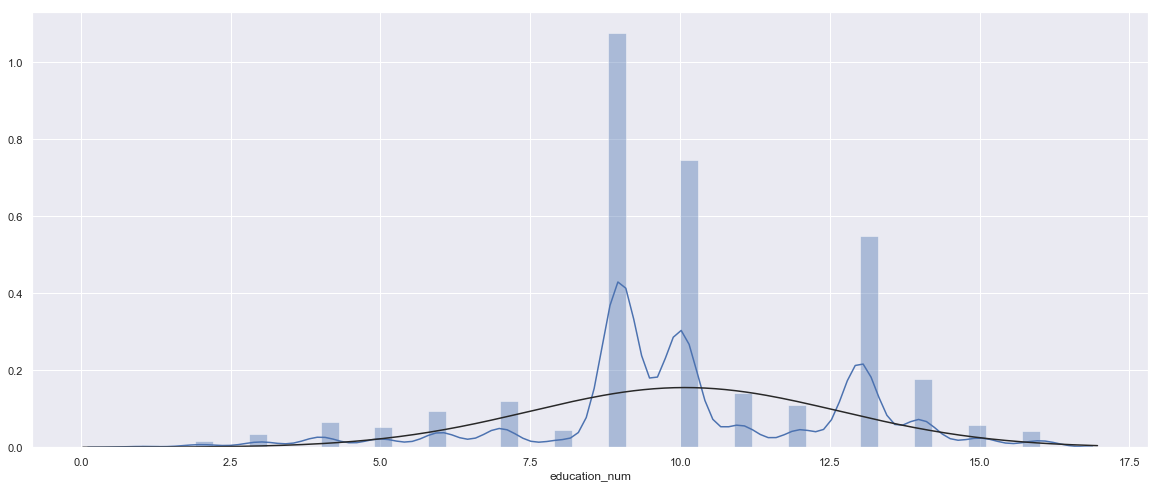

In [153]:
sns.distplot(train['education_num'], hist=True, fit=norm)

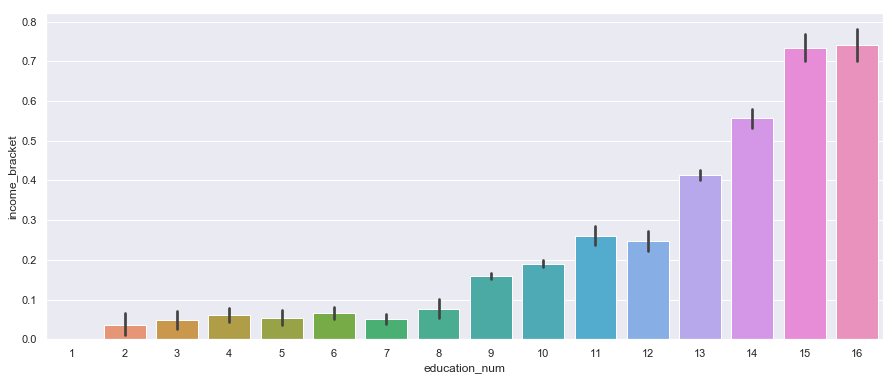

In [154]:
figsize(15, 6)
sns.barplot(x='education_num', y='income_bracket', data=train)

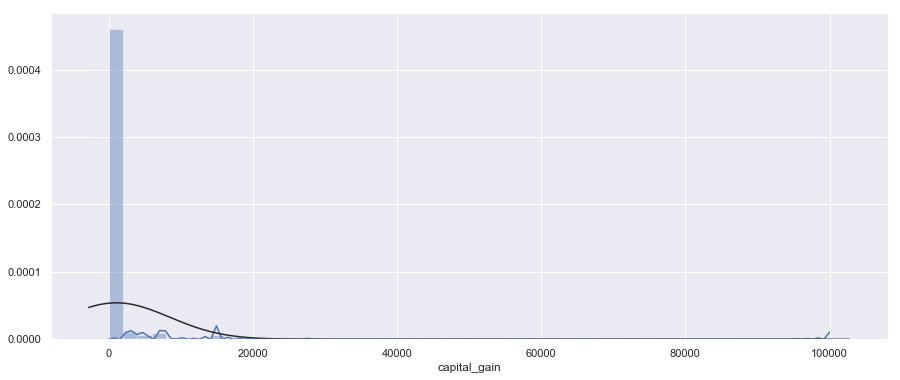

In [155]:
sns.distplot(train['capital_gain'], hist=True, fit=norm)

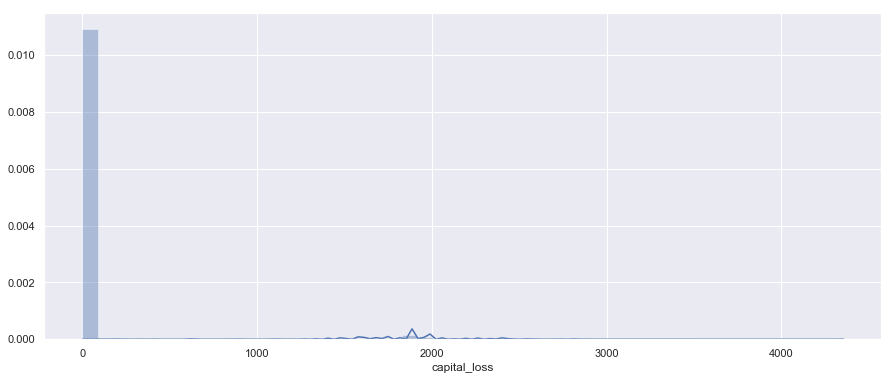

In [156]:
sns.distplot(train['capital_loss'], hist=True)

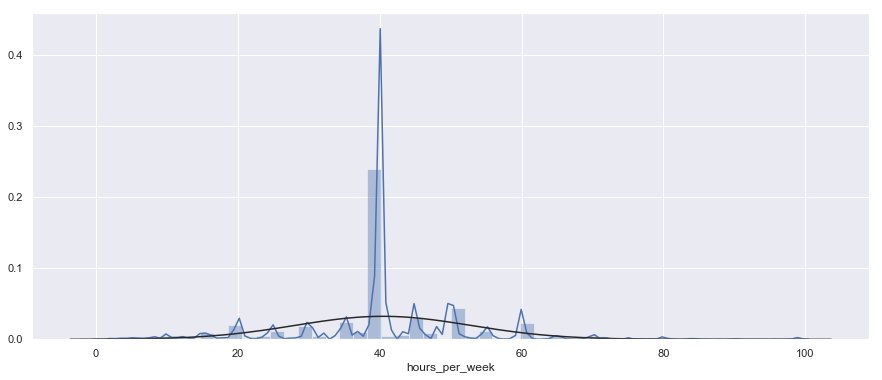

In [157]:
sns.distplot(train['hours_per_week'], hist=True, fit=norm)

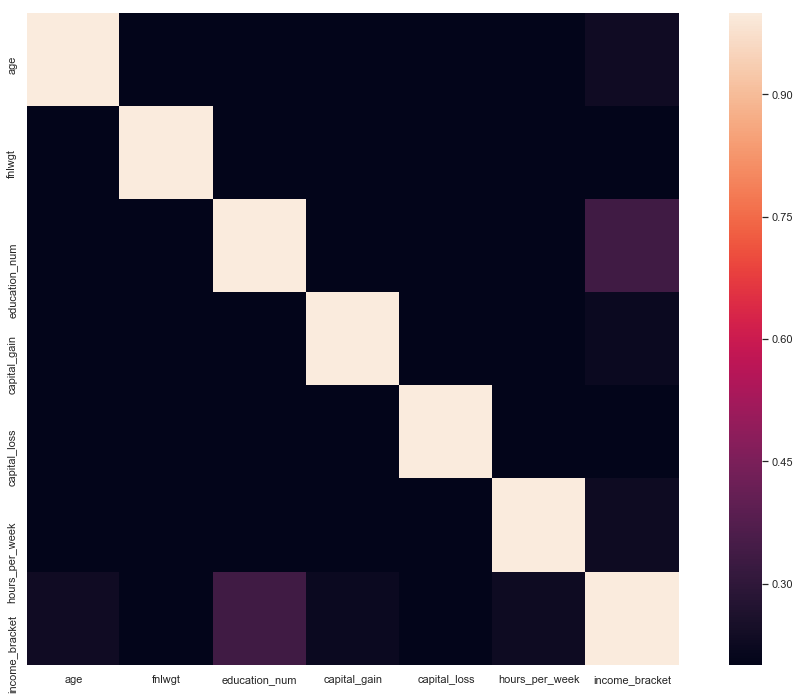

In [158]:
corrmatrix = train.corr(method='pearson')
f, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corrmatrix, vmin=0.2, square=True)

In [160]:
train = pd.get_dummies(train)
train_y = train['income_bracket']
train = train.drop(['income_bracket'], axis=1)

## SKLEARN LOG-Regression

In [169]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(train, train_y, random_state=33, test_size=0.2)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

sk_log = LogisticRegression()
sk_log.fit(x_train, y_train)
y_train_pred = sk_log.predict(x_train)
y_test_pred = sk_log.predict(x_test)

print('Accuracy Score for Training Data Prediction',accuracy_score(y_train_pred, y_train))



/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  del sys.path[0]
/Users/ethanpeterson/anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

Accuracy Score for Training Data Prediction 0.7991016584766585


In [168]:
print('Accuracy Score for Test Data Prediction', accuracy_score(y_test_pred, y_test))


Accuracy Score for Test Data Prediction 0.7939505604176262


## LOG-Regression From Scratch

In [ ]:
def sigmoid(z):
  '''
  Returns the sigmoid of z.
  Given the logit (AKA the log of the odds), then the sigmoid inverses the log and returns the original value of the odds.
  '''
  return 1 / (1 + np.exp(-z))


def predict(features, weights):

    return sigmoid( np.dot(features, weights) )

def cost_function_for_all_training_samples(features, labels, weights):
    m = features.shape[0]  # m = number of samples
    predictions = predict(features, weights)
    return -(1/m) * np.sum( labels*np.log(predictions) + (1-labels)*np.log(1-predictions) )

def decision_boundary(probability, threshold=0.5):
      return 1 if probability >= threshold else 0

def calculate_gradient(features, labels, weights):
    predictions = predict(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)

        # Log Progress
        if i % 100 == 0:
            cost = cost_function_for_all_training_samples(features, labels, weights)
            print("iteration:", str(i), "cost:", str(cost))

    return weights
  
def _classify(predictions):
    decide = np.vectorize(decision_boundary)
    return decide(predictions).flatten()

def scale(X, norm_params):
    x_min = norm_params[0]
    x_max = norm_params[1]
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom

In [176]:
def train_with_file(data_file, iters):
    columns = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','gender','capital_gain','capital_loss','hours_per_week','native_country','income_bracket']
    train = pd.read_csv(data_file, names=columns)
    test = pd.read_csv('adult-test.csv', names=columns, skiprows=1)
    test['income_bracket'] = test['income_bracket'].apply(lambda x: 0 if x==' >50K' else 0)
    train['income_bracket'] = train['income_bracket'].apply(lambda x: 1 if x==' >50K' else 0)
    train_y = train['income_bracket']
    train['training_set'] = True
    test['training_set'] = False
    all_data = pd.concat([train,test])
    
    all_data = all_data.drop(['income_bracket'], axis=1)
    all_data = pd.get_dummies(all_data)
    train_x = all_data[all_data['training_set']==True]
    train_x = train_x.drop('training_set', axis=1)
    normalization_params = [0,1]
    train_x = scale(train_x, normalization_params)
    lr = 0.1
    initial_weights = [0] * train_x.shape[1]
    iterations = iters
    weights = fit(train_x, train_y, initial_weights, lr, iterations)
    return weights, normalization_params



def classify(data_file, weights, normalization_params):
    columns = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','gender','capital_gain','capital_loss','hours_per_week','native_country','income_bracket']
    test = pd.read_csv(data_file, names=columns, skiprows=1)
    train = pd.read_csv('adult-training.csv', names=columns)
    test['income_bracket'] = test['income_bracket'].apply(lambda x: 0 if x==' >50K' else 0)
    train['income_bracket'] = train['income_bracket'].apply(lambda x: 1 if x==' >50K' else 0)
    test_y = test['income_bracket']
    train['training_set'] = True
    test['training_set'] = False
    all_data = pd.concat([train,test])
    all_data = all_data.drop(['income_bracket'], axis=1)
    all_data = pd.get_dummies(all_data)
    all_data = pd.get_dummies(all_data)
    test_x = all_data[all_data['training_set']==False]
    test_x = test_x.drop('training_set', axis=1)
    test_x = scale(test_x, normalization_params)
    y_test_probabilities = predict(test_x, weights).flatten()
    labels = _classify(y_test_probabilities)
    
    
    return labels

In [177]:
weights, normalization_params = train_with_file("adult-training.csv",1000)

labels = classify('adult-test.csv',weights, normalization_params)

print('Accuracy Score for Test Data Prediction', accuracy_score(labels, test_y))


iteration: 0 cost: 0.6673527327501676
iteration: 100 cost: 0.4405495171880037
iteration: 200 cost: 0.41404065290826714
iteration: 300 cost: 0.4015694066704977
iteration: 400 cost: 0.3937806593650562
iteration: 500 cost: 0.3882647907144724
iteration: 600 cost: 0.38405401830484465
iteration: 700 cost: 0.38067443839377296
iteration: 800 cost: 0.3778658790412143
iteration: 900 cost: 0.37547278440910753
Accuracy Score for Test Data Prediction 0.8320127756280327
